In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import plotly.express as px
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")

import warnings
warnings.filterwarnings('ignore')

## 1. 데이터 생성

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
del df['CustomerID']
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

In [ ]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


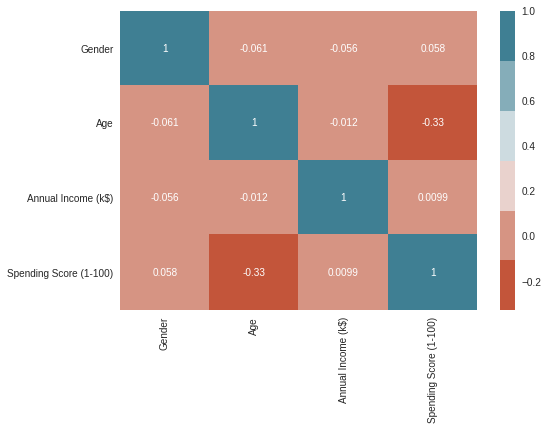

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap=sns.diverging_palette(20, 220))

## 2. K-Means vs Hierarchical vs DBSCAN 비교

### (1) K-Means Clustering
- Center-based clustering(중심 기반 군집화) : 동일한 군집에 속하는 데이터는 어떠한 중심을 기준으로 분포할 것이라는 가정
- 중심 pick -> 가까운 애들 반복적으로 pick하며 몸집을 키우는 방식

K-means clustering에서 중요한 것은 1) K의 값과 2) 초기 중심(centroid)이다. 초기 중심을 적절하게 정하기 위한 다양한 연구들이 있지만, 가장 기본적인 방법은 랜덤 초기화이다. 
적절한 K값을 구하는 방법은 2가지: 
1. Elbow Method </br>
군집 내 편차 제곱합(WSS)이 최소가 되도록 군집의 중심을 결정해 나가는 방법으로, WSS가 급격하게 감소하는 포인트를 K로 지정한다. 
$WSS = \sum(x-\mu c)$
2. Silhouette Coefficient </br>
군집 안의 데이터가 자신이 속한 군집 내의 다른 데이터와 얼마나 유사한지, 다른 군집과는 얼마나 다른지 특정한 계수로, 1에 가까울수록 적절하게 군집화가 되었다고 판단한다. 
$S = \frac{b-a}{max(a,b)}$

### Elbow Method를 통한 K값 정하기

Text(0, 0.5, 'WSS')

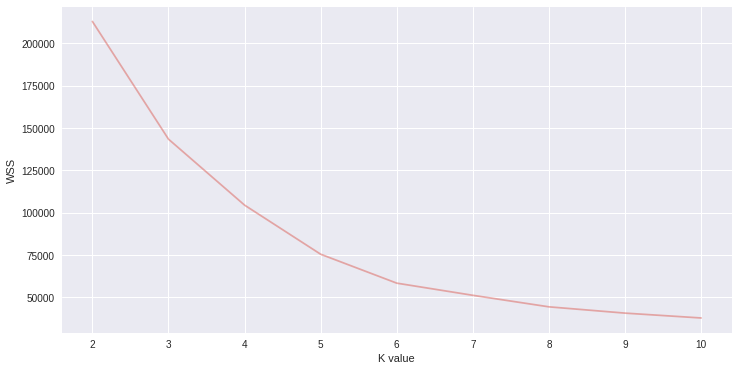

In [ ]:
from sklearn.cluster import KMeans

wss = []
k_list = [2,3,4,5,6,7,8,9,10]
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)
        
plt.figure(1 , figsize = (12, 6))
plt.plot(k_list , wss , '-' , alpha = 0.5)
plt.xlabel('K value')
plt.ylabel('WSS')

대략적으로 보았을 때, elbow지점은 6으로 보이지만, 명확하진 않다. 따라서 2번 silhouette 계수도 계산하여 확인한다.

### Silhouette 계수를 통한 K값 정하기

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silscore = []
for k in k_list:
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For k_value =", k,"Silhouette_score is :", silhouette_avg)
    silscore.append(silhouette_avg)


For k_value = 2 Silhouette_score is : 0.29307334005502633
For k_value = 3 Silhouette_score is : 0.383798873822341
For k_value = 4 Silhouette_score is : 0.4052954330641215
For k_value = 5 Silhouette_score is : 0.4440669204743008
For k_value = 6 Silhouette_score is : 0.45205475380756527
For k_value = 7 Silhouette_score is : 0.43946743327036053
For k_value = 8 Silhouette_score is : 0.43249096868827536
For k_value = 9 Silhouette_score is : 0.3801528290281677
For k_value = 10 Silhouette_score is : 0.3853426412732716


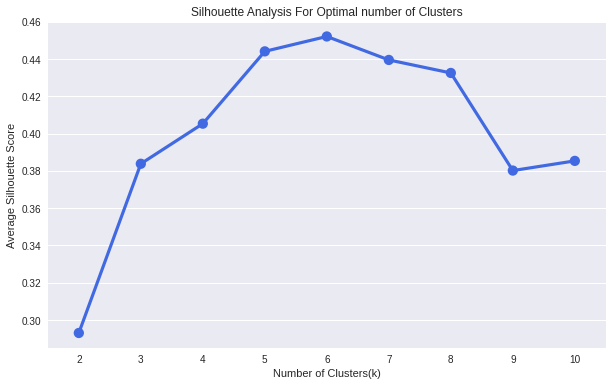

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis For Optimal number of Clusters')
sns.pointplot(x=k_list,y=silscore,color='royalblue')
plt.show()

확인한 결과, 1번에서 예측했듯 6이 가장 좋은 k값임을 알 수 있다. 

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

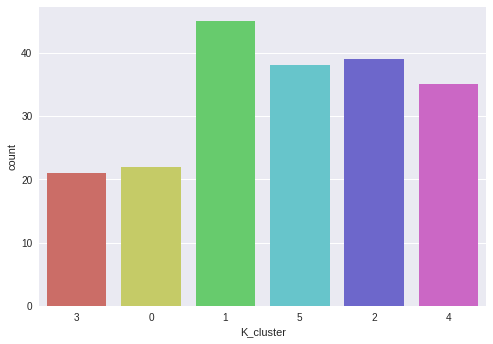

In [ ]:
Kmeansdf = df.copy()
Kmeansdf['K_cluster'] = kmeans.labels_
Kmeansdf["K_cluster"] = Kmeansdf["K_cluster"].astype(str)

sns.countplot(Kmeansdf['K_cluster'])

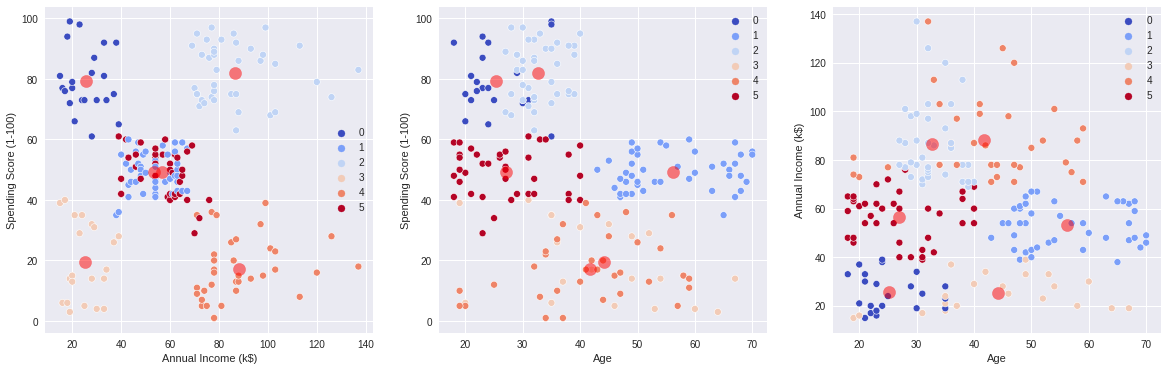

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue=kmeans.labels_,palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(132)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(133)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)


In [ ]:
px.scatter_3d(data_frame=Kmeansdf,x='Annual Income (k$)',y='Spending Score (1-100)',z='Age',color='K_cluster',
             title='3D Scatter plot for KMeans Clusters')

### (2) Agglomerative Hierarchical Clustering

- 시작할 때 각 포인트를 하나의 클러스터로 지정하고 가장 비슷한 두 클러스터를 합치는 방식

mglearn 패키지에서 이 과정을 잘 설명해놓아 추가한다.

In [ ]:
!pip install mglearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import mglearn

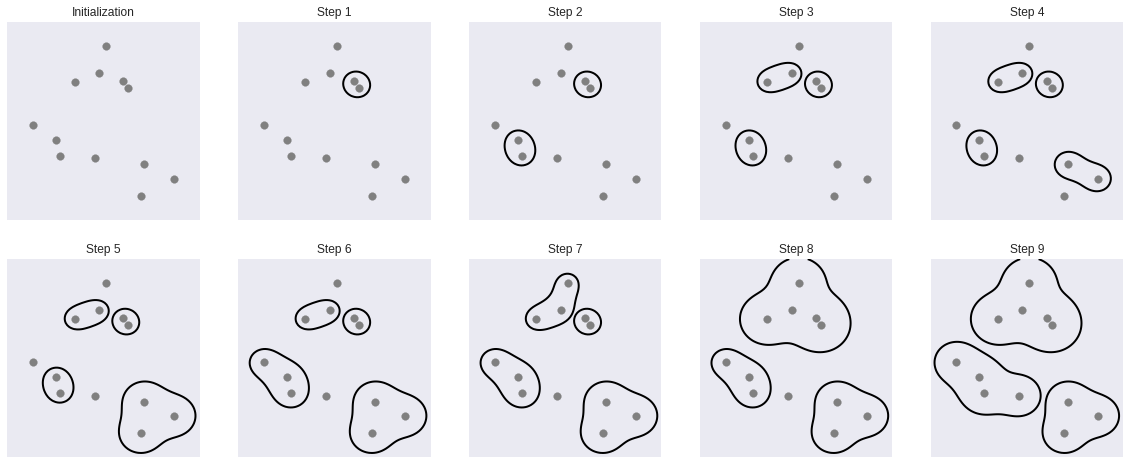

In [ ]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean')
model.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

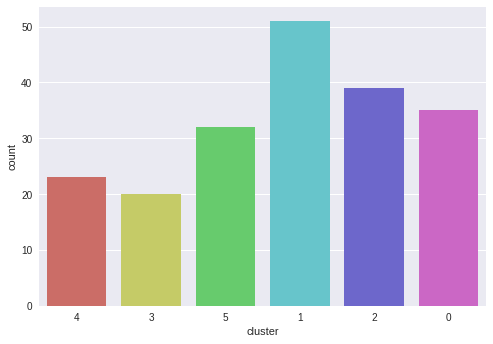

In [ ]:
Aggdf = df.copy()
Aggdf['cluster'] = model.labels_
Aggdf["cluster"] = Aggdf["cluster"].astype(str)

sns.countplot(Aggdf['cluster'])

In [ ]:
px.scatter_3d(data_frame=Aggdf,x='Annual Income (k$)',y='Spending Score (1-100)',z='Age',color='cluster',
             title='3D Scatter plot for Hierarchical Clusters')

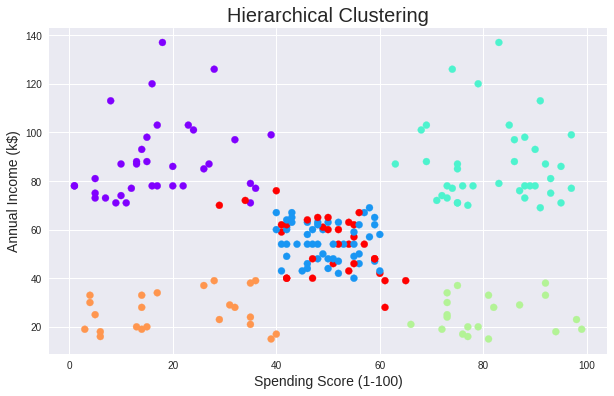

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"],c=model.labels_,cmap='rainbow')
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel("Spending Score (1-100)",fontsize=14)
plt.ylabel('Annual Income (k$)',fontsize=14)
plt.show()

3d plot과 함께 고려한 결과, 꽤나 괜찮은 결과를 보였다.

### (3) DBSCAN
- partitional clustering 중 밀도 기반 알고리즘

In [ ]:
from sklearn.cluster import DBSCAN

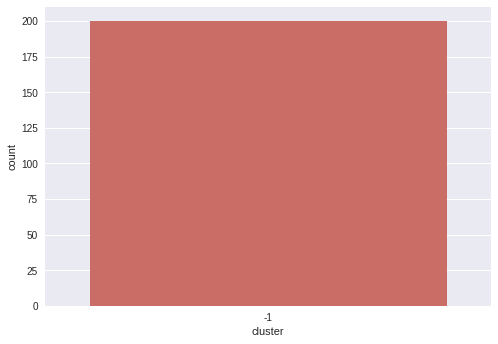

In [ ]:
dbscan=DBSCAN() # eps = 0.5 / min_samples = 5
dbscan.fit(df)

DBSCANdf = df.copy()
DBSCANdf['cluster'] = dbscan.labels_
DBSCANdf["cluster"] = DBSCANdf["cluster"].astype(str)

sns.countplot(DBSCANdf['cluster'])

기본값으로 했을 때는 분류가 아예 안되는 치명적인 문제가 발생했다. 따라서, 값을 수정해주었다.

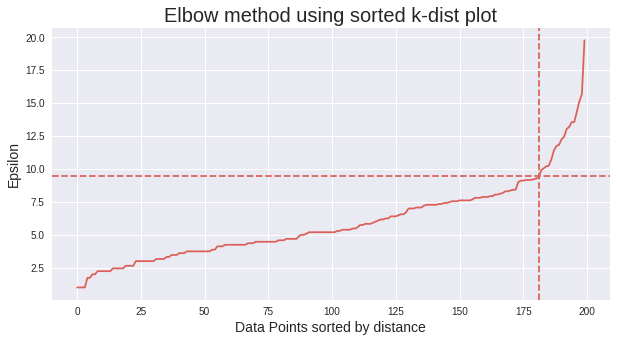

In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(df)
distances, indices = neighbors.kneighbors(df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.axvline(181, 0, 2, ls='--')
plt.axhline(9.5, 0, 200, ls='--')

plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

- eps의 최적 값은  그래프에서 최대 곡률 지점으로 eps = 9 정도이다. 
- min_samples는 도메인 지식에 따라 달라지는데 여기서는 기본값인 5로 설정

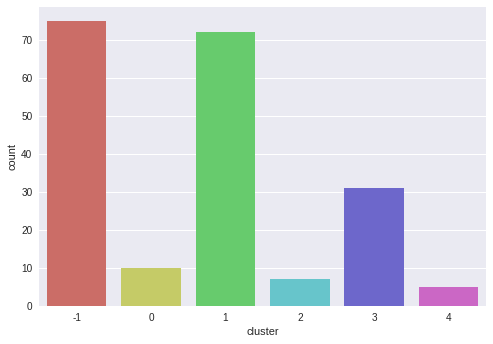

In [ ]:
dbscan=DBSCAN(eps=9.5, min_samples=5) # eps = 0.5 / min_samples = 5
dbscan.fit(df)

DBSCANdf = df.copy()
DBSCANdf['cluster'] = dbscan.labels_
DBSCANdf["cluster"] = DBSCANdf["cluster"].astype(str)

sns.countplot(DBSCANdf['cluster'])

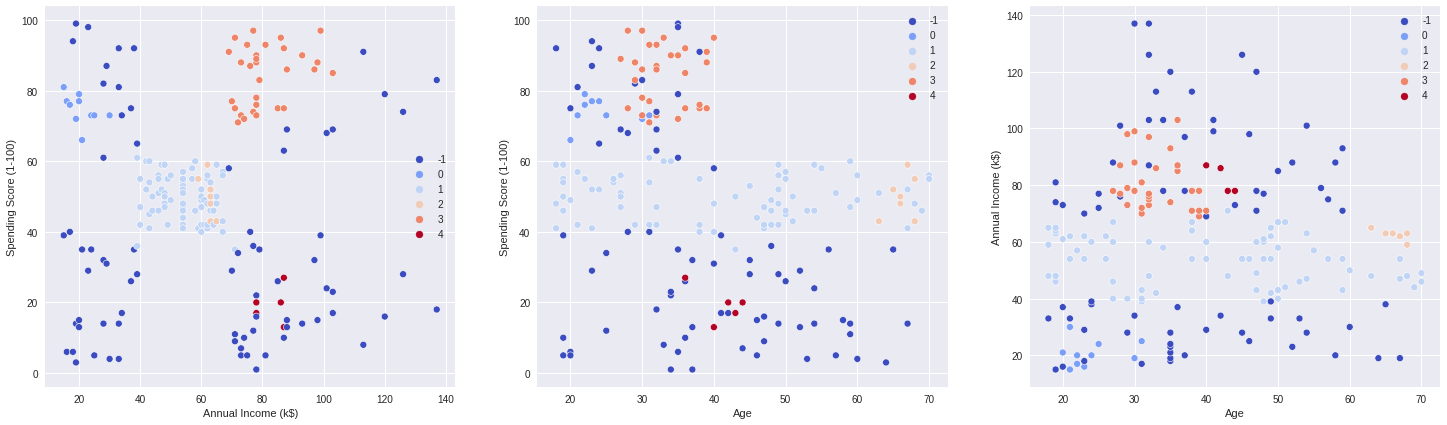

In [ ]:
plt.figure(figsize=(25, 7))
plt.subplot(131)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(132)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(133)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue=dbscan.labels_, palette='coolwarm')


In [ ]:
px.scatter_3d(data_frame=DBSCANdf,x='Annual Income (k$)',y='Spending Score (1-100)',z='Age',color='cluster',
             title='3D Scatter plot for DBSCAN Clusters')

3d, 2d 모두 제대로 클러스터링하지 못했다는 것을 확인했다.